In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.17.0'

In [2]:
keras.__version__

'3.6.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [12]:
hidden1 = model.layers[1]

In [13]:
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0159505 , -0.04955055,  0.02341182, ..., -0.01306358,
        -0.05169866,  0.00692963],
       [-0.04159169, -0.06409206, -0.03357859, ...,  0.01282714,
         0.01744534, -0.05937626],
       [-0.00421891, -0.02232314, -0.00890866, ..., -0.03983759,
         0.05232321,  0.04443377],
       ...,
       [ 0.03287968,  0.03803086,  0.00609908, ..., -0.07348364,
         0.03176539,  0.05300099],
       [ 0.03920225, -0.04762451,  0.00714003, ..., -0.05961829,
        -0.02525432,  0.0161738 ],
       [ 0.00961163, -0.00214307,  0.02849086, ..., -0.0721423 ,
        -0.06352658,  0.01469925]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.6940 - loss: 0.9863 - val_accuracy: 0.8308 - val_loss: 0.5055
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.8257 - loss: 0.5061 - val_accuracy: 0.8516 - val_loss: 0.4425
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8403 - loss: 0.4512 - val_accuracy: 0.8294 - val_loss: 0.4656
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.8498 - loss: 0.4252 - val_accuracy: 0.8586 - val_loss: 0.4029
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.8605 - loss: 0.3964 - val_accuracy: 0.8678 - val_loss: 0.3812
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.8627 - loss: 0.3914 - val_accuracy: 0.8734 - val_loss: 0.3739
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.8691 - loss: 0.3710 - val_accuracy: 0.8706 - val_loss: 0.3758
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.8742 -

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

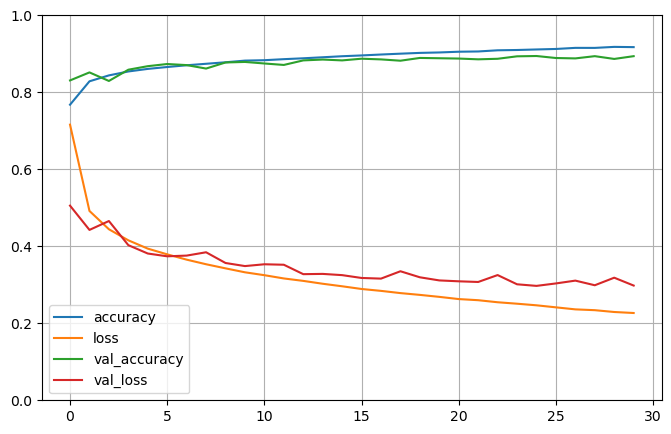

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.8385 - loss: 66.0404


[68.33531188964844, 0.8374000191688538]

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
#y_pred = model.predict_classes(X_new)
y_pred=np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP using the Sequential API

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
housing = fetch_california_housing()

In [66]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
275/363 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - loss: 1.4401

/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.3017 - val_loss: 0.5969
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 1.2882 - val_loss: 0.5352
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.5387 - val_loss: 0.4857
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.4965 - val_loss: 0.4680
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.4476 - val_loss: 0.4453
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.4338 - val_loss: 0.4297
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.4222 - val_loss: 0.4343
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.4570 - val_loss: 0.4178
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.4253 - val_loss: 0.4159
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.4099 - val_loss: 0.4151
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.3974 - val_loss: 0.3988
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

In [51]:
y_pred

array([[3.639711 ],
       [2.8166833],
       [4.471374 ]], dtype=float32)

## Building complex model using Functional API

In [53]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

## Using the Subclassing API to build dynamic models

In [57]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(hidden2)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
model.compile(loss="mean_squared_error", optimizer="sgd")

In [58]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [59]:
model.call(inputs=[X_new_A, X_new_B])

(<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[0.09039201],
        [0.05940925],
        [0.11626342]], dtype=float32)>,
 <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[ 0.40869278],
        [-0.3714043 ],
        [-0.32990265]], dtype=float32)>)

In [60]:

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 1.9015 - val_loss: 0.7714
Epoch 2/20
  3/363 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.9255

/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:731: UserWarning: Gradients do not exist for variables ['kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.7091 - val_loss: 0.6665
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.6893 - val_loss: 0.6094
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.5612 - val_loss: 0.5498
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.5343 - val_loss: 0.5150
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.4850 - val_loss: 0.4959
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.4600 - val_loss: 0.4737
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.4339 - val_loss: 0.5023
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.4357 - val_loss: 0.4426
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.4121 - val_loss: 0.4631
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.4166 - val_loss: 0.4225
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.3939 - val_loss: 0.4166
Epoch 13/20
363/363 ━━━━━━━━━━━━━━━━━━━━

In [69]:
model.save("my_keras_model.h5")

In [71]:
model = keras.models.load_model("my_keras_model.h5")
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[2.0329034],
       [1.4524059],
       [0.8832139]], dtype=float32)